In [41]:
import pandas as pd
from nltk.tokenize import word_tokenize
import string
punctuations = string.punctuation
data = pd.read_csv('./dataset/hi-train.csv', encoding='utf-8')
text = data['text'].tolist()
data.head()

label                                               text
0     india  मेट्रो की इस लाइन के चलने से दक्षिणी दिल्ली से...
1  pakistan  नेटिजन यानि इंटरनेट पर सक्रिय नागरिक अब ट्विटर...
2      news  इसमें एक फ़्लाइट एटेनडेंट की मदद की गुहार है औ...
3     india  प्रतीक खुलेपन का, आज़ाद ख्याली का और भीड़ से अ...
4     india  ख़ासकर पिछले 10 साल तक प्रधानमंत्री रहे मनमोहन...

In [42]:
unique_labels = data['label'].unique()
print(unique_labels)

['india' 'pakistan' 'news' 'international' 'entertainment' 'sport'
 'science' 'china' 'learningenglish' 'social' 'southasia' 'business'
 'institutional' 'multimedia']


In [43]:
with open('./dataset/stopwords.txt', 'r') as f:
    stop_words = f.read().split('\n')
stop_words = set(stop_words)

In [44]:
def preprocess_function(text):
    preprocessed_texts = []
    for i in text:
        tokenized_text = word_tokenize(i)
        stop_words_removed_text = [word for word in tokenized_text if word not in stop_words]
        stop_words_removed_text = [word for word in stop_words_removed_text if not word.isdigit()]
        stop_words_removed_text = [word for word in stop_words_removed_text if word not in punctuations]
        for j in stop_words_removed_text:
            if j in ['.', ',', '!', '?', '``', "''"]:
                stop_words_removed_text.remove(j)
        stop_words_removed_text = [word for word in stop_words_removed_text if len(word) > 2]
        preprocessed_text = ' '.join(stop_words_removed_text)
        preprocessed_texts.append(preprocessed_text)
    return preprocessed_texts

In [45]:
preprocessed_text = preprocess_function(text)

In [46]:
preprocessed_text

['मेट्रो लाइन चलने दक्षिणी दिल्ली नोएडा काफी जाएगा यात्रियों राजीव चौक मंडी हाउस होकर नहीं जाना पड़ेगा.लेकिन मजेंटा लाइन महत्वपूर्ण क्योंकि ड्राइवलैस यानी बिना ड्राइवर वाली मेट्रो चलाने योजना भारत पहली बार होगा मेट्रो बिना ड्राइवर चलाई जाएगी मेट्रो तीसरे फेज भारत पहली बार ड्राइवरलेस तकनीक आएगी दुनिया देशों ड्राइवरलेस मेट्रो चलती देशों ड्राइवरलेस मेट्रो सफल दक्षिण कोरिया राजधानी सोल ड्राइवलेस ट्रेन कामयाबी मेट्रो ज़मीन चलती ड्राइवर केबिन नहीं यूरोप डेनमार्क स्पेन इटली फ्रांस जर्मनी हंगरी स्विट्जरलैंड ब्रिटेन ड्राइवरलैस मेट्रो चलती देशों ज़्यादा शहरों ऐसी मेट्रो चलाई अलावा अमेरिका कनाडा ड्राइवरलेस ट्रेन चलती ब्राजील पेरू चाइल मेट्रो काफ़ी चुकी भारत पड़ोसी देश चीन ड्राइवरलेस मेट्रो चलती सऊदी अरब क़तर सिंगापुर जाएं वहां बिना ड्राइवर मेट्रो मज़ा उठा मेट्रो ख़ास ड्राइवरलेस मेट्रो नाम पता चला चलाने ड्राइवर ज़रूरत नहीं पड़ती मेट्रो रुकावट पहचानने आपातकालीन परिस्थितियों स्वचालित तरीके काम करती भले ड्राइवर गतिविधि नज़र रखी ट्रेन कहां गति कहां रुकना स्वचालित भारत ड्राइवरलेस मेट्रो बारे ज़्यादा या

In [47]:
# Convert the preprocessed text into a dataframe with the same index as the original dataframe and add the label column to it.
preprocessed_text_df = pd.DataFrame(preprocessed_text, columns=['text'])
preprocessed_text_df['label'] = data['label']
preprocessed_text_df.head()


text     label
0  मेट्रो लाइन चलने दक्षिणी दिल्ली नोएडा काफी जाए...     india
1  नेटिजन यानि इंटरनेट सक्रिय नागरिक ट्विटर सरकार...  pakistan
2  फ़्लाइट एटेनडेंट मदद गुहार डिक चेनी निर्देश ज़...      news
3  प्रतीक खुलेपन आज़ाद ख्याली भीड़ अलग का.सवा साल...     india
4  ख़ासकर पिछले साल प्रधानमंत्री मनमोहन सिंह सुनन...     india

In [48]:
# Store the above dataframe as a csv file.
preprocessed_text_df.to_csv('./dataset/preprocessed_text.csv', index=False)

In [49]:
test_data = pd.read_csv('./dataset/hi-test.csv', encoding='utf-8')
test_text = test_data['text'].tolist()
test_preprocessed_text = preprocess_function(test_text)
test_labels = test_data['label'].tolist()

In [50]:
print(test_data[3:4]['text'])

3    हालांकि उनके अंगरक्षकों को बमों को जाम करने वा...
Name: text, dtype: object


In [51]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",use_fast=False)
sequence_to_classify = test_preprocessed_text[3]
candidate_labels = unique_labels
output = classifier(sequence_to_classify, candidate_labels, multi_label=False)

In [55]:
print(f"label: {output['labels'][0]}")
print(f"score: {output['scores'][0]}")

label: institutional
score: 0.3380032777786255


In [ ]:
predict_labels = []
for i in test_preprocessed_text:
    output = classifier(i, candidate_labels, multi_label=False)
    predict_labels.append(output['labels'][0])

In [ ]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(test_labels, predicted_labels, unique_labels)

In [52]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
# Train a LSA model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_text)
lsa = TruncatedSVD(n_components=5, n_iter=100)

lsa.fit(X)

terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")

# Transform the input corpus to the topic space
lsa_text = lsa.transform(X)
print(lsa_text.shape)
print(lsa_text[:5])

# Create a dataframe for the topic space
topic_encoded_df = pd.DataFrame(lsa_text)
topic_encoded_df['label'] = data['label']
topic_encoded_df.head()

# Create a dictionary to map the labels
label_dict = {}
for i, label in enumerate(unique_labels):
    label_dict[label] = i

# Map the labels to the dataframe
topic_encoded_df['label'] = topic_encoded_df['label'].map(label_dict)
topic_encoded_df.head()

# Split the dataframe into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(topic_encoded_df.drop('label', axis=1), topic_encoded_df['label'], test_size=0.2, random_state=42)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

Topic 0: 
नह
रत
उन
कर
सरक
पर
मह
जन
टर
सम
 
Topic 1: 
अमर
हमल
रपत
ओब
चरमप
इल
इसर
अफ
रक
कहन
 
Topic 2: 
जप
सरक
दव
जनत
रध
जन
रद
नर
नम
यम
 
Topic 3: 
रत
अमर
पन
बन
कप
अर
ओब
ऑस
ओवर
आउट
 
Topic 4: 
रत
मल
अद
बल
सज
आर
लत
उन
सल
ऑस
 
(3467, 5)
[[ 0.16048199 -0.00570784 -0.04998157  0.0338208  -0.02792956]
 [ 0.22281506 -0.01219306 -0.01074694  0.06253724 -0.06906677]
 [ 0.21993198 -0.00633327 -0.09254284  0.0303604  -0.0217626 ]
 [ 0.24326721 -0.02315219 -0.06772505  0.15557971 -0.0262246 ]
 [ 0.38854842 -0.12084241  0.13903917 -0.04107008  0.02438073]]
              precision    recall  f1-score   support

           0       0.52      0.89      0.66       272
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        45
           3       0.46      0.47      0.46       182
           4       0.75      0.05      0.09        63
           5       0.71      0.68      0.69        40
           6       0.00      0.00      0.00        37
           7      

/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(3467, 6496)
Topic 0: 
नह
 
रत
 
उन
 
कर
 
सरक
 
पर
 
मह
 
जन
 
टर
 
सम
 
Topic 1: 
अमर
 
हमल
 
रपत
 
ओब
 
चरमप
 
इल
 
इसर
 
अफ
 
रक
 
कहन
 
Topic 2: 
जप
 
सरक
 
दव
 
जनत
 
रध
 
जन
 
रद
 
नर
 
नम
 
यम
 
Topic 3: 
रत
 
अमर
 
पन
 
बन
 
कप
 
अर
 
ओब
 
ऑस
 
ओवर
 
आउट
 
Topic 4: 
रत
 
मल
 
अद
 
बल
 
सज
 
आर
 
लत
 
उन
 
सल
 
ऑस
 


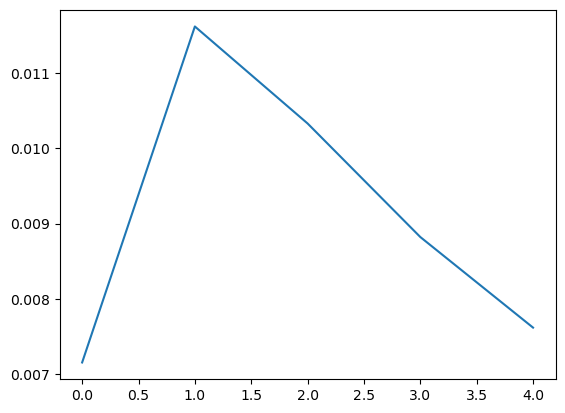

/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.004474287238028338
0.02977282208208739
0.13623273312632284
0.13068359274421273


In [54]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_text)
print(X.shape)

lsa = TruncatedSVD(n_components=5, n_iter=100)
lsa.fit(X)

terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

import matplotlib.pyplot as plt
explained_variance = lsa.explained_variance_ratio_
plt.plot(explained_variance)
plt.show()

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X)
clusters = km.labels_.tolist()
data['cluster'] = clusters

from sklearn.metrics import silhouette_score
print(silhouette_score(X, km.labels_))

from sklearn.metrics import adjusted_rand_score
print(adjusted_rand_score(data['label'], km.labels_))

from sklearn.metrics import adjusted_mutual_info_score
print(adjusted_mutual_info_score(data['label'], km.labels_))

from sklearn.metrics import homogeneity_score
print(homogeneity_score(data['label'], km.labels_))
